# LSTM Network For Music Classification

In [ ]:
# Import libraries
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import h5py
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Import Drive
from google.colab import drive
drive.mount('/content/drive/')

#Libraries to install
!pip install pretty_midi
import pretty_midi
import music21
from music21 import converter, chord, key
import csv
from keras.utils import to_categorical

# Keras tuner
!pip install -q -U keras-tuner
!pip install keras-tuner --upgrade

Mounted at /content/drive/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.9 MB/s eta 0:00:00


### Data Collection/ Preprocessing

#### Data preprocessing Function (Part 1) RUN ONCE

* The following data collection and preprocessing takes a MIDI file path and sequence length as input. It extracts non-drum notes from the MIDI file, normalizes their pitch, velocity, and duration values, creates sequences of the given length, and returns these sequences along with the file name. If a KeyError occurs, it returns an empty array and the file name while printing an error message.

In [ ]:
# def preprocess_midi(midi_file_path, sequence_length):
#     """
#     The preprocess_midi function takes a MIDI file path and sequence
#     length as input. It extracts non-drum notes from the MIDI file,
#     normalizes their pitch, velocity, and duration values, creates
#     sequences of the given length, and returns these sequences along
#     with the file name. If a KeyError occurs, it returns an empty array
#     and the file name while printing an error message.
#     """
#     try:
#         # Load the MIDI file
#         midi_data = pretty_midi.PrettyMIDI(midi_file_path)
#         file_name = os.path.basename(midi_file_path)

#         # Remove drum parts (instruments with program number 9)
#         non_drum_instruments = [inst for inst in midi_data.instruments if not inst.is_drum]
#         midi_data.instruments = non_drum_instruments

#         # Extract notes and represent them numerically as (pitch, velocity, duration) tuples
#         notes = [(note.pitch, note.velocity, note.end - note.start) for instrument in midi_data.instruments for note in instrument.notes]
#         notes_array = np.array(notes)

#         # Normalize the values to the range [0, 1]
#         max_pitch = np.max(notes_array[:, 0])
#         max_velocity = np.max(notes_array[:, 1])
#         max_duration = np.max(notes_array[:, 2])
#         notes_array[:, 0] /= max_pitch
#         notes_array[:, 1] /= max_velocity
#         notes_array[:, 2] /= max_duration

#         # Split notes into sequences of the specified length
#         sequences = [notes_array[i:i + sequence_length] for i in range(len(notes_array) - sequence_length)]

#         return np.array(sequences), file_name

#     except KeyError as e:
#         print(f"KeyError occurred in file {midi_file_path}: {e}")
#         return np.empty((0, sequence_length, 3)), file_name

#### Preprocessing to readily available dataframes for **Pitch, Velocity, Duration, and File Name** (RUN ONCE for each composer)

* This code processes MIDI files in a given directory, generating sequences from them with a specified length. Processed sequences and corresponding file names are stored in a DataFrame, which is then saved as an HDF5 file. This data preparation is intended to be used later in the preprocessing for the LSTM Model

##### Mozart

In [ ]:
# main_folder_path = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/NN_midi_files_extended/train/mozart'
# sequence_length = 100

# all_sequences = []
# file_names = []

# for root, dirs, files in os.walk(main_folder_path):
#     for filename in files:
#         if filename.lower().endswith('.mid') or filename.lower().endswith('.midi'):
#             midi_file_path = os.path.join(root, filename)
#             sequences, file_name = preprocess_midi(midi_file_path, sequence_length)
#             all_sequences.extend(sequences)
#             file_names.extend([file_name] * len(sequences))

# all_sequences = np.array(all_sequences)
# file_names = np.array(file_names)

# df_data = {
#     'Pitch': all_sequences[:, :, 0].flatten(),
#     'Velocity': all_sequences[:, :, 1].flatten(),
#     'Duration': all_sequences[:, :, 2].flatten(),
#     'File Name': file_names.repeat(sequence_length),
# }

# df = pd.DataFrame(df_data)

# output_hdf5_file = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/Sequences/mozart.h5'
# df.to_hdf(output_hdf5_file, key='df', mode='w')

# df.head()

##### Chopin

In [ ]:
# main_folder_path = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/NN_midi_files_extended/train/chopin'
# sequence_length = 100

# all_sequences = []
# file_names = []

# for root, dirs, files in os.walk(main_folder_path):
#     for filename in files:
#         if filename.lower().endswith('.mid') or filename.lower().endswith('.midi'):
#             midi_file_path = os.path.join(root, filename)
#             sequences, file_name = preprocess_midi(midi_file_path, sequence_length)
#             all_sequences.extend(sequences)
#             file_names.extend([file_name] * len(sequences))

# all_sequences = np.array(all_sequences)
# file_names = np.array(file_names)

# df_data = {
#     'Pitch': all_sequences[:, :, 0].flatten(),
#     'Velocity': all_sequences[:, :, 1].flatten(),
#     'Duration': all_sequences[:, :, 2].flatten(),
#     'File Name': file_names.repeat(sequence_length),
# }

# df = pd.DataFrame(df_data)

# output_hdf5_file = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/Sequences/chopin.h5'
# df.to_hdf(output_hdf5_file, key='df', mode='w')

# df.head()

##### Handel

In [ ]:
# main_folder_path = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/NN_midi_files_extended/train/handel'
# sequence_length = 100

# all_sequences = []
# file_names = []

# for root, dirs, files in os.walk(main_folder_path):
#     for filename in files:
#         if filename.lower().endswith('.mid') or filename.lower().endswith('.midi'):
#             midi_file_path = os.path.join(root, filename)
#             sequences, file_name = preprocess_midi(midi_file_path, sequence_length)
#             all_sequences.extend(sequences)
#             file_names.extend([file_name] * len(sequences))

# all_sequences = np.array(all_sequences)
# file_names = np.array(file_names)

# df_data = {
#     'Pitch': all_sequences[:, :, 0].flatten(),
#     'Velocity': all_sequences[:, :, 1].flatten(),
#     'Duration': all_sequences[:, :, 2].flatten(),
#     'File Name': file_names.repeat(sequence_length),
# }

# df = pd.DataFrame(df_data)

# output_hdf5_file = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/Sequences/handel.h5'
# df.to_hdf(output_hdf5_file, key='df', mode='w')

# df.head()

##### Byrd

In [ ]:
# main_folder_path = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/NN_midi_files_extended/train/byrd'
# sequence_length = 100

# all_sequences = []
# file_names = []

# for root, dirs, files in os.walk(main_folder_path):
#     for filename in files:
#         if filename.lower().endswith('.mid') or filename.lower().endswith('.midi'):
#             midi_file_path = os.path.join(root, filename)
#             sequences, file_name = preprocess_midi(midi_file_path, sequence_length)
#             all_sequences.extend(sequences)
#             file_names.extend([file_name] * len(sequences))

# all_sequences = np.array(all_sequences)
# file_names = np.array(file_names)

# df_data = {
#     'Pitch': all_sequences[:, :, 0].flatten(),
#     'Velocity': all_sequences[:, :, 1].flatten(),
#     'Duration': all_sequences[:, :, 2].flatten(),
#     'File Name': file_names.repeat(sequence_length),
# }

# df = pd.DataFrame(df_data)

# output_hdf5_file = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/Sequences/byrd.h5'
# df.to_hdf(output_hdf5_file, key='df', mode='w')

# df.head()

##### Schumann

In [ ]:
# main_folder_path = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/NN_midi_files_extended/train/schumann'
# sequence_length = 100

# all_sequences = []
# file_names = []

# for root, dirs, files in os.walk(main_folder_path):
#     for filename in files:
#         if filename.lower().endswith('.mid') or filename.lower().endswith('.midi'):
#             midi_file_path = os.path.join(root, filename)
#             sequences, file_name = preprocess_midi(midi_file_path, sequence_length)
#             all_sequences.extend(sequences)
#             file_names.extend([file_name] * len(sequences))

# all_sequences = np.array(all_sequences)
# file_names = np.array(file_names)

# df_data = {
#     'Pitch': all_sequences[:, :, 0].flatten(),
#     'Velocity': all_sequences[:, :, 1].flatten(),
#     'Duration': all_sequences[:, :, 2].flatten(),
#     'File Name': file_names.repeat(sequence_length),
# }

# df = pd.DataFrame(df_data)

# output_hdf5_file = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/Sequences/schumann.h5'
# df.to_hdf(output_hdf5_file, key='df', mode='w')

# df.head()

##### Mendelssohn

In [ ]:
# main_folder_path = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/NN_midi_files_extended/train/mendelssohn'
# sequence_length = 100

# all_sequences = []
# file_names = []

# for root, dirs, files in os.walk(main_folder_path):
#     for filename in files:
#         if filename.lower().endswith('.mid') or filename.lower().endswith('.midi'):
#             midi_file_path = os.path.join(root, filename)
#             sequences, file_name = preprocess_midi(midi_file_path, sequence_length)
#             all_sequences.extend(sequences)
#             file_names.extend([file_name] * len(sequences))

# all_sequences = np.array(all_sequences)
# file_names = np.array(file_names)

# df_data = {
#     'Pitch': all_sequences[:, :, 0].flatten(),
#     'Velocity': all_sequences[:, :, 1].flatten(),
#     'Duration': all_sequences[:, :, 2].flatten(),
#     'File Name': file_names.repeat(sequence_length),
# }

# df = pd.DataFrame(df_data)

# output_hdf5_file = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/Sequences/mendelssohn.h5'
# df.to_hdf(output_hdf5_file, key='df', mode='w')

# df.head()

##### Hummel

In [ ]:
# main_folder_path = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/NN_midi_files_extended/train/hummel'
# sequence_length = 100

# all_sequences = []
# file_names = []

# for root, dirs, files in os.walk(main_folder_path):
#     for filename in files:
#         if filename.lower().endswith('.mid') or filename.lower().endswith('.midi'):
#             midi_file_path = os.path.join(root, filename)
#             sequences, file_name = preprocess_midi(midi_file_path, sequence_length)
#             all_sequences.extend(sequences)
#             file_names.extend([file_name] * len(sequences))

# all_sequences = np.array(all_sequences)
# file_names = np.array(file_names)

# df_data = {
#     'Pitch': all_sequences[:, :, 0].flatten(),
#     'Velocity': all_sequences[:, :, 1].flatten(),
#     'Duration': all_sequences[:, :, 2].flatten(),
#     'File Name': file_names.repeat(sequence_length),
# }

# df = pd.DataFrame(df_data)

# output_hdf5_file = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/Sequences/hummel.h5'
# df.to_hdf(output_hdf5_file, key='df', mode='w')

# df.head()

##### Bach

In [ ]:
# main_folder_path = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/NN_midi_files_extended/train/bach'
# sequence_length = 100

# all_sequences = []
# file_names = []

# for root, dirs, files in os.walk(main_folder_path):
#     for filename in files:
#         if filename.lower().endswith('.mid') or filename.lower().endswith('.midi'):
#             midi_file_path = os.path.join(root, filename)
#             sequences, file_name = preprocess_midi(midi_file_path, sequence_length)
#             all_sequences.extend(sequences)
#             file_names.extend([file_name] * len(sequences))

# all_sequences = np.array(all_sequences)
# file_names = np.array(file_names)

# df_data = {
#     'Pitch': all_sequences[:, :, 0].flatten(),
#     'Velocity': all_sequences[:, :, 1].flatten(),
#     'Duration': all_sequences[:, :, 2].flatten(),
#     'File Name': file_names.repeat(sequence_length),
# }

# df = pd.DataFrame(df_data)

# output_hdf5_file = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/Sequences/bach.h5'
# df.to_hdf(output_hdf5_file, key='df', mode='w')

# df.head()

##### Barktok

In [ ]:
# main_folder_path = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/NN_midi_files_extended/train/bartok'
# sequence_length = 100

# all_sequences = []
# file_names = []

# for root, dirs, files in os.walk(main_folder_path):
#     for filename in files:
#         if filename.lower().endswith('.mid') or filename.lower().endswith('.midi'):
#             midi_file_path = os.path.join(root, filename)
#             sequences, file_name = preprocess_midi(midi_file_path, sequence_length)
#             all_sequences.extend(sequences)
#             file_names.extend([file_name] * len(sequences))

# all_sequences = np.array(all_sequences)
# file_names = np.array(file_names)

# df_data = {
#     'Pitch': all_sequences[:, :, 0].flatten(),
#     'Velocity': all_sequences[:, :, 1].flatten(),
#     'Duration': all_sequences[:, :, 2].flatten(),
#     'File Name': file_names.repeat(sequence_length),
# }

# df = pd.DataFrame(df_data)

# output_hdf5_file = '/content/drive/MyDrive/AA USD/AI 511 Deep Learning/AAI 511 Project Group ~3/Data/Sequences/bartok.h5'
# df.to_hdf(output_hdf5_file, key='df', mode='w')

# df.head()

### Import Preprocessed Data

In [ ]:
# Read  sort files by name
filenames = glob.glob("/content/drive/MyDrive/AAI 511 Project Group ~3/Data/Sequences/*")
filenames.sort()
filenames

['/content/drive/MyDrive/AAI 511 Project Group ~3/Data/Sequences/bach.h5',
 '/content/drive/MyDrive/AAI 511 Project Group ~3/Data/Sequences/bartok.h5',
 '/content/drive/MyDrive/AAI 511 Project Group ~3/Data/Sequences/byrd.h5',
 '/content/drive/MyDrive/AAI 511 Project Group ~3/Data/Sequences/chopin.h5',
 '/content/drive/MyDrive/AAI 511 Project Group ~3/Data/Sequences/handel.h5',
 '/content/drive/MyDrive/AAI 511 Project Group ~3/Data/Sequences/hummel.h5',
 '/content/drive/MyDrive/AAI 511 Project Group ~3/Data/Sequences/mendelssohn.h5',
 '/content/drive/MyDrive/AAI 511 Project Group ~3/Data/Sequences/mozart.h5',
 '/content/drive/MyDrive/AAI 511 Project Group ~3/Data/Sequences/schumann.h5']

In [ ]:
# 1000 length for each song
def segment_data(d):
  out = pd.DataFrame()
  for f in d['File Name'].unique():
    out = out.append(d[d['File Name'] == f][0:1000])
  return out

In [ ]:
# Create one dataframe with all files
df = pd.DataFrame()
for i in filenames:
  j = pd.read_hdf(i)
  df = df.append(segment_data(j))

<ipython-input-3-cc2dfe2a42c9>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out = out.append(d[d['File Name'] == f][0:1000])
<ipython-input-3-cc2dfe2a42c9>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out = out.append(d[d['File Name'] == f][0:1000])
<ipython-input-3-cc2dfe2a42c9>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out = out.append(d[d['File Name'] == f][0:1000])
<ipython-input-3-cc2dfe2a42c9>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out = out.append(d[d['File Name'] == f][0:1000])
<ipython-input-3-cc2dfe2a42c9>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

In [ ]:
# Value counts for file names
df['File Name'].value_counts()

bach368.mid           1000
hummel295.mid         1000
mendelssohn276.mid    1000
mendelssohn250.mid    1000
mendelssohn286.mid    1000
                      ... 
byrd190.mid           1000
byrd159.mid           1000
byrd183.mid           1000
schumann241.mid       1000
bartok396.mid          900
Name: File Name, Length: 369, dtype: int64

In [ ]:
# Drop file name with too little data
df = df[df['File Name'] != 'bartok396.mid']

In [ ]:
# Reset index
df.index = range(0,len(df))

In [ ]:
# Create labels for composer
y = []
for x in df['File Name'].unique():
  try:
    if 'bach' in x:
      for i in range(1,11):
        y.append(1)
    elif 'bartok' in x:
      for i in range(1,11):
        y.append(2)
    elif 'byrd' in x:
      for i in range(1,11):
        y.append(3)
    elif 'chopin' in x:
      for i in range(1,11):
        y.append(4)
    elif 'handel' in x:
      for i in range(1,11):
        y.append(5)
    elif 'hummel' in x:
      for i in range(1,11):
        y.append(6)
    elif 'mendelssohn' in x:
      for i in range(1,11):
        y.append(7)
    elif 'mozart' in x:
      for i in range(1,11):
        y.append(8)
    elif 'schumann' in x:
      for i in range(1,11):
        y.append(9)
  except:
    continue

In [ ]:
# Seperate predictors
X = df[['Pitch','Velocity','Duration']]
X

,Pitch,Velocity,Duration
0,0.619048,1.000000,0.049391
1,0.761905,1.000000,0.098609
2,0.619048,1.000000,0.049391
3,0.904762,1.000000,0.024348
4,0.619048,1.000000,0.049391
...,...,...,...
367995,0.421569,0.485981,0.213896
367996,0.509804,0.457944,0.232970
367997,0.656863,0.663551,0.242507
367998,0.745098,0.654206,0.085831


<ipython-input-10-002c7ac09ef9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ = df.corr()


<Axes: >

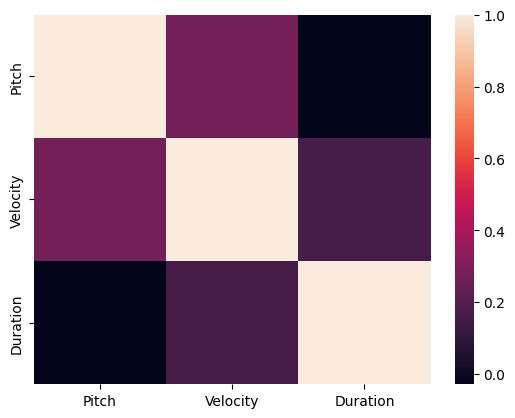

In [ ]:
# Plot correlations to check for multicolinearity
corr_ = df.corr()
sns.heatmap(corr_)

### No evidence of strong multicolinearity.

In [ ]:
# Segment data by composer. Break each song into sequences so that each input is size (100,3)
X_ = []
start = 0
stop = 0

for i in range(0,368):
  s = 0
  for j in range(100,1100,100):
    X_.append(X[s+start:j+stop])
    s = s + 100
  start = start + 1000
  stop = stop + 1000

In [ ]:
# Ensure than segmentation was done properly
len(X_) == len(y)

True

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = .2,random_state = 0)

In [ ]:
#Create array
X_train,X_test = np.asarray(X_train),np.asarray(X_test)

In [ ]:
# Print data shape
print(X_train.shape,X_test.shape)

(2944, 100, 3) (736, 100, 3)


In [ ]:
# Prepare y_train for model
y_train = tf.keras.utils.to_categorical(y_train,num_classes=None)
y_train.shape

(2944, 10)

### Now we are going to do some hyperparameter tuning using Keras Tuner. These are the parameters we are optimizing:

- Number of nodes in each layer
- Number of intermediate layers
- Learning rate
-Dropout


In [ ]:
def build_lstm(hp):

   # Build model
  model = keras.Sequential()

  # Number of nodes in layer
  hp_input_units = hp.Choice('input_layer',[32,64,100,120,240])
  hp_units = hp.Choice('units',[32,64,100,120,240])


  # Learning rate
  hp_learn = hp.Choice('learning_rate',values = [0.0001,0.001,0.01])

  #Dropout
  hp_drop = hp.Choice('dropout',values =[0.2,0.4])

  # Layers
  # Input layer
  model.add(keras.layers.LSTM(units = hp_input_units,
                              input_shape = (100,3),return_sequences = True))


  # Choose number of intermediate layers for LSTM (between 1 and 2)
  for i in range(hp.Int(name = 'n_layers_lstm',min_value = 1,max_value = 2)):
    model.add(keras.layers.LSTM(units = hp.Choice(name = 'layer_'+str(i)+'_units', values = [32,64,100,120,240]),
          dropout = hp_drop,return_sequences = True))

  model.add(keras.layers.LSTM(units = hp_units,dropout = hp_drop))

  # Output layer
  model.add(Dense(10, activation='softmax'))

    # Compile model
  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = hp_learn),
                metrics = ['accuracy','Precision','Recall'])


  return model

In [ ]:
import keras_tuner as kt

# Initialize tuner
tuner = kt.Hyperband(build_lstm,objective = 'val_loss',max_epochs = 20)

# Stop training early
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

# Tune the model
tuner.search(X_train,y_train,epochs = 300,validation_split = 0.2,callbacks = [early_stop])

Trial 30 Complete [00h 00m 17s]
val_loss: 1.7943718433380127

Best val_loss So Far: 1.2799066305160522
Total elapsed time: 00h 09m 15s


In [ ]:
# Best parameters
best_params = tuner.get_best_hyperparameters(num_trials = 1)[0]
print(best_params.values)

{'input_layer': 32, 'units': 120, 'learning_rate': 0.0001, 'dropout': 0.2, 'n_layers_lstm': 2, 'layer_0_units': 120, 'layer_1_units': 240, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0023'}


In [ ]:
# Model with tuned hyperparameters
tune_model = tuner.hypermodel.build(best_params)
tune_model.fit(X_train,y_train,epochs = 300,verbose = 0)

In [ ]:
# Evaluate model on test data
y_test = tf.keras.utils.to_categorical(y_test,num_classes=None)
results = tune_model.evaluate(X_test,y_test)
print(results)

23/23 [==============================] - 2s 9ms/step - loss: 0.2911 - accuracy: 0.8940 - precision: 0.9011 - recall: 0.8913
[0.2910904288291931, 0.89402174949646, 0.901098906993866, 0.8913043737411499]


In [ ]:
# Make predictions on the test data
predictions = tune_model.predict(X_test)

# Print F1 score
F1 = 2 * ((results[2] * results[3])/(results[2]+results[3]))
print('F1 Score: ',F1)

23/23 [==============================] - 1s 8ms/step
F1 Score:  0.8961748794028663


### The model performed well with 89% accuracy, F1 score and recall, and 90% precision. Additionally, judging by the validation loss during tuning there wasn't evidence of overfitting.

In [ ]:
# Convert back to vector
new_y_test = []
for n in y_test:
  new_y_test.append(np.where(n == 1)[0][0])
new_y_test[0:5]

[2, 9, 6, 8, 2]

In [ ]:
# Convert back to vector
new_predictions = []
for i in predictions:
  new_predictions.append(np.where(i == max(i))[0][0])
new_predictions[0:5]

[2, 9, 6, 8, 2]

In [ ]:
# Create a DataFrame with the true and predicted target values

results_df = pd.DataFrame({'True_Target': new_y_test, 'Predicted_Target': new_predictions})

# Reset the index to have integer indices
results_df.reset_index(drop=True, inplace=True)

# Display the results DataFrame
print("\nResults DataFrame:")
results_df


Results DataFrame:


,True_Target,Predicted_Target
0,2,2
1,9,9
2,6,6
3,8,8
4,2,2
...,...,...
731,4,4
732,4,4
733,2,2
734,5,5


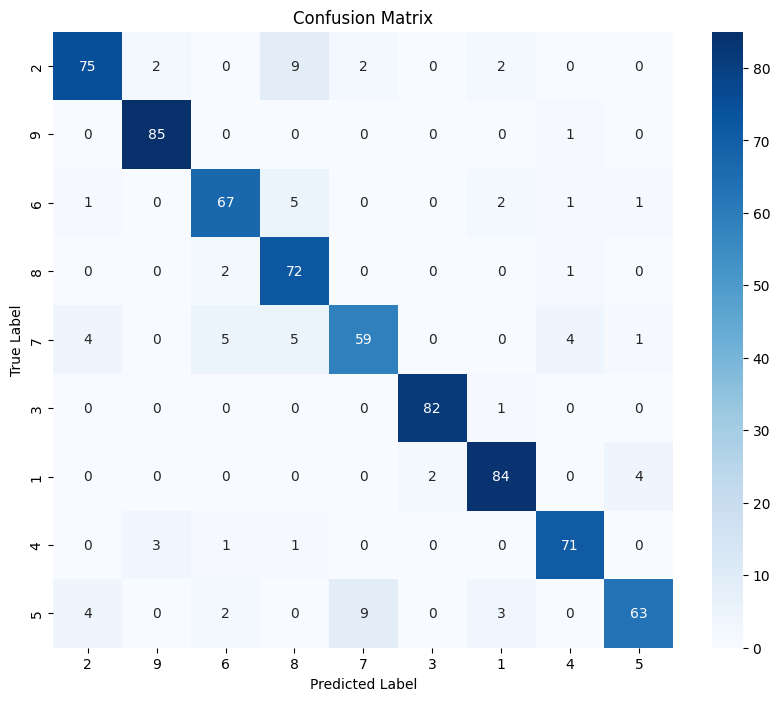

Classification Report:
              precision    recall  f1-score   support

           2       0.89      0.83      0.86        90
           9       0.94      0.99      0.97        86
           6       0.87      0.87      0.87        77
           8       0.78      0.96      0.86        75
           7       0.84      0.76      0.80        78
           3       0.98      0.99      0.98        83
           1       0.91      0.93      0.92        90
           4       0.91      0.93      0.92        76
           5       0.91      0.78      0.84        81

    accuracy                           0.89       736
   macro avg       0.89      0.89      0.89       736
weighted avg       0.90      0.89      0.89       736



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique target values (class labels)
unique_classes = results_df['True_Target'].unique()

# Create a confusion matrix
cm = confusion_matrix(results_df['True_Target'], results_df['Predicted_Target'], labels=unique_classes)

# Create a classification report
class_report = classification_report(results_df['True_Target'], results_df['Predicted_Target'], labels=unique_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:")
print(class_report)

### Categories that the model has the most trouble predicting:

- 5 (Handel) which is most often misclassified as 7 (Mendelssohn)
- 2 (Bartok) which is most often misclassified as 8 (Mozart)
- 7 (Mendelssohn) most often misclassifed as 6 or 8 (Hummel and Mozart)

### Export Model Weights to folder

In [ ]:
tune_model.save_weights('my_model.hdf5')